# Title:  Project 6 - Custom EDA with Jupyter and Python
# Author:  James Pinkston
# Due Date:  Oct. 6, 2024
# Purpose:  To show use of Exploratory Data Analysis with Jupyter Notebooks and Python

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
## Data Acquisition

# Load the flights.csv dataset into DataFrame
df = pd.read_csv('flights.csv')

# Inspect the DataFrame
df

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


The flights.csv file has been loaded into a Pandas data frame and inspected.

In [14]:
## Initial Data Inspection

print(df.head(10))
print(df.shape)
print(df.dtypes)

   year      month  passengers
0  1949    January         112
1  1949   February         118
2  1949      March         132
3  1949      April         129
4  1949        May         121
5  1949       June         135
6  1949       July         148
7  1949     August         148
8  1949  September         136
9  1949    October         119
(144, 3)
year           int64
month         object
passengers     int64
dtype: object


The data frame has been further inspected to show the data types used in the dataset.

In [15]:
## Summary Statistics

print(df.describe())

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


Here I am showing a summary statistical analysis of the dataset.

In [17]:
## Transform data to long form.

flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Let's transform the dataset into long form data structure to test different visualizations.

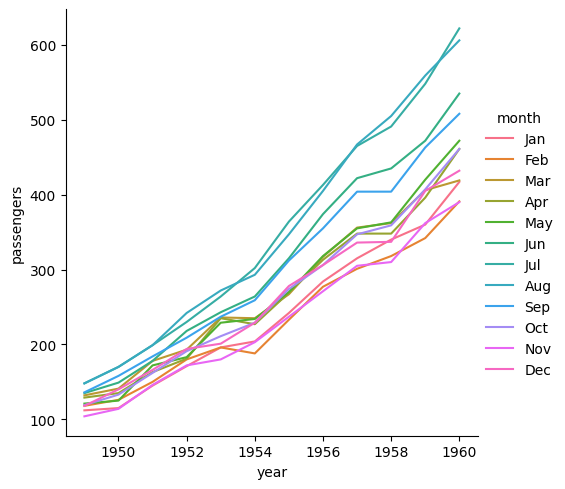

In [18]:
## Initial Data Distribution for Long Form data.

sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

As the "Age of Flight" progressed, more and more people began flying. The above graph shows how the average number of passengers sharply increased between 1949 and 1960.

In [19]:
## Initial Data Distribution for Wide Form data.

flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


I am now going to test different visualizations using a wide form data structure.

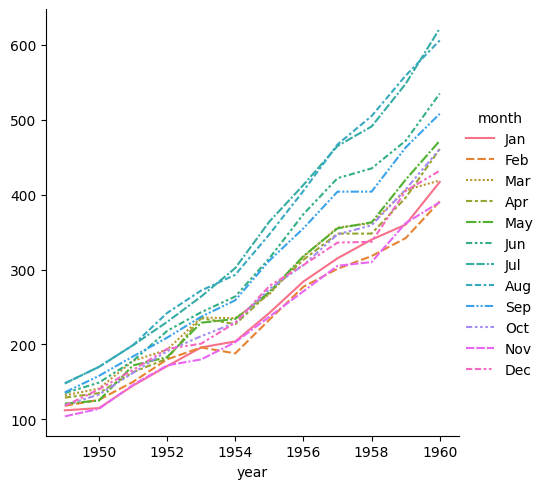

In [20]:
## Comparison of long form vs wide form data using plot graphs.

sns.relplot(data=flights_wide, kind="line")

The plot graph repeated above shows that wide form data is not as visually appealing as the plot graph using long form data. I also lost the "passengers" column label while maintaining the actual number of passengers. This data structure could lead to confusion in further visualizations, so with this dataset, it does not seem as efficient as using a long form data structure.

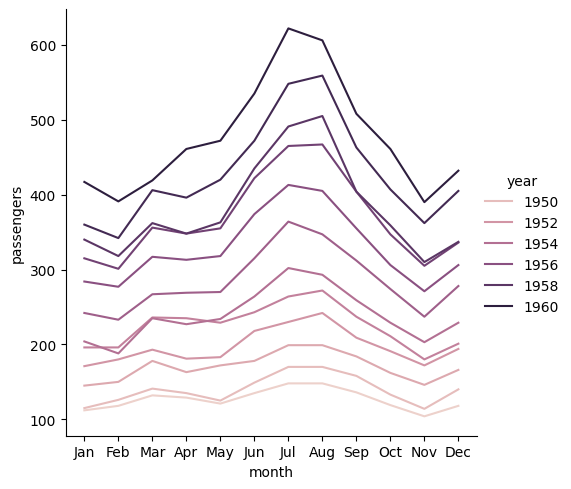

In [21]:
## Proper use of wide form data and visualization

sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

However, by reassigning the variables, wide form data can be just as visually appealing as long form data.

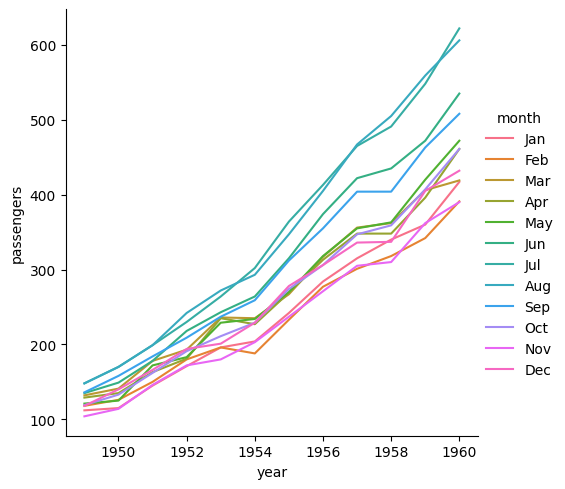

In [22]:
## 2nd Data Visualization using preferred long form.

flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

I personally prefer the long form data structure. For this project, it works quite well with the dataset chosen.

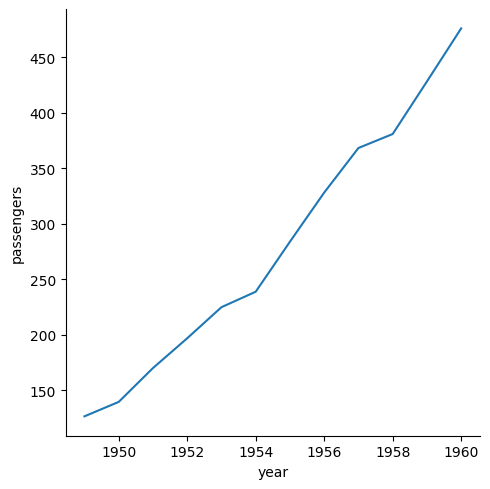

In [23]:
## 3rd Data Visualization using statistical analysis (mean).

flights_avg = flights.groupby("year").mean(numeric_only=True)
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line")

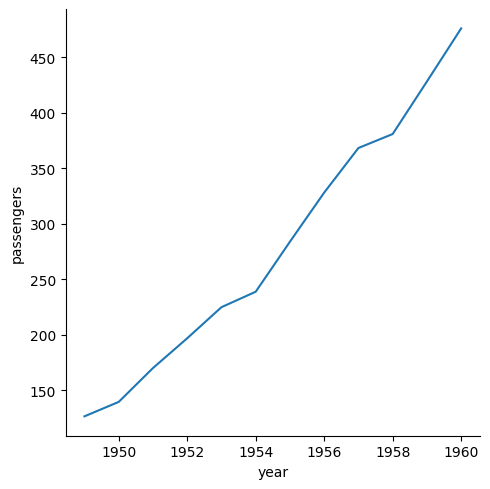

In [24]:
## 4th Data Visualization using more statistical analysis (average).

year = flights_avg.index
passengers = flights_avg["passengers"]
sns.relplot(x=year, y=passengers, kind="line")

The long form data structure seems much more useful in visualizing the flights.csv dataset. Comparing the two data structures, long form and wide form, served as a good exercise with this custom EDA project.